### Importing Libraries

In [196]:
import numpy as np
import pandas as pd

### Reading the Dataset

In [197]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
 "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
 "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
 "peak-rpm","city-mpg","highway-mpg","price"]

In [206]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\auto.csv", names=headers)
print(df.shape)
df.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Replace the ? Values with NaN 

In [207]:
df.replace('?', np.nan,inplace=True)

### Checking NaN Values

In [208]:
df.isnull().sum()[df.isnull().sum() > 0]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

### Drop Rows with NaN values in Price Column

In [209]:
df.dropna(subset=['price'], inplace=True, how='any')
df.shape

(201, 26)

### Replace the NaN Values of the given columns by their Mean

In [230]:
cols = ['normalized-losses',
        'bore',
        'stroke',
        'horsepower',
        'peak-rpm']

for j in cols:
    df[j] = df[j].astype(np.float64)

for i in cols:
        df[i].fillna(df[i].mean(), inplace=True)

### Replace the NaN Value of the Column by its Mode

In [232]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

### Resetting the Index

In [237]:
df = df.reset_index().drop('index', axis=1)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Checking the Data Types of the Columns in the Dataframe

In [238]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [239]:
df['price'] = df['price'].astype(np.float64)

### Transform city-mpg and highway-mpg into liters/100km

In [240]:
df['city-L/100km'] = 235/df['city-mpg']
df['highway-L/100km'] = 235/df['highway-mpg']

### Normalizing the Columns Length, Width and Height

In [241]:
cols1 = ['length','width','height']

for i in cols1:
    df[i] = df[i]/df[i].max()

### Horsepower Histogram

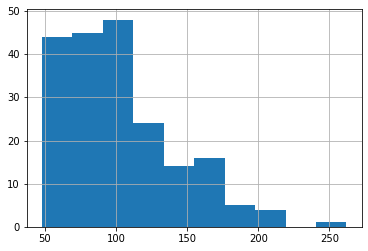

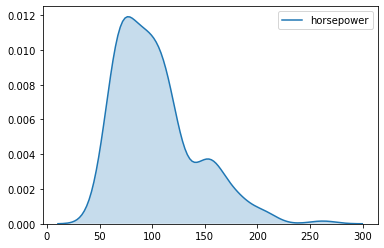

In [252]:
import matplotlib.pyplot as plt

df['horsepower'].hist()
plt.show()

import seaborn as sns

sns.kdeplot(df['horsepower'], shade=True, )
plt.show()

### Horsepower-binned Distribution

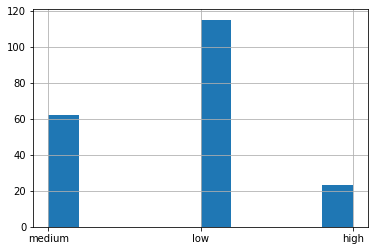

In [257]:
binwidth = (df['horsepower'].max() - df['horsepower'].min())/4 
bins = np.arange(df['horsepower'].min(), df['horsepower'].max(), binwidth)
groups = ['low', 'medium', 'high'] 
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels = groups, include_lowest = True)

df['horsepower-binned'].hist()
plt.show()

### One Hot Encoding on columns Fuel-Type and Aspiration

In [258]:
df1 = pd.concat( [df,pd.get_dummies( df["fuel-type"]) , pd.get_dummies(df["aspiration"])], axis=1)
df1.drop( ["fuel-type", "aspiration"], axis=1)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,medium,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,medium,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,medium,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,medium,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,23,28,16845.0,10.217391,8.392857,medium,0,1,1,0
197,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,19,25,19045.0,12.368421,9.400000,high,0,1,0,1
198,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,18,23,21485.0,13.055556,10.217391,medium,0,1,1,0
199,-1,95.0,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,26,27,22470.0,9.038462,8.703704,medium,1,0,0,1
